In [ ]:
!python --version

Python 3.11.13


In [ ]:
!pip install tensorflow==2.12.0 tensorflow-text==2.12.0 tensorflow-hub==0.13.0  transformers==4.29.0

Found existing installation: tensorflow 2.12.0
Uninstalling tensorflow-2.12.0:
  Successfully uninstalled tensorflow-2.12.0
Found existing installation: tensorflow-text 2.12.0
Uninstalling tensorflow-text-2.12.0:
  Successfully uninstalled tensorflow-text-2.12.0
Found existing installation: tensorflow-hub 0.13.0
Uninstalling tensorflow-hub-0.13.0:
  Successfully uninstalled tensorflow-hub-0.13.0
Found existing installation: transformers 4.29.0
Uninstalling transformers-4.29.0:
  Successfully uninstalled transformers-4.29.0
  Using cached tensorflow-2.12.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.4 kB)
  Using cached tensorflow_text-2.12.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.0 kB)
  Using cached tensorflow_hub-0.13.0-py2.py3-none-any.whl.metadata (1.7 kB)
  Using cached transformers-4.29.0-py3-none-any.whl.metadata (111 kB)
Using cached tensorflow-2.12.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (586.0 MB)

In [ ]:
!pip install torch
!pip install nltk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 80.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 23.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 45.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
import pandas as pd
import numpy as np

import re
import tensorflow as tf
print(tf.__version__)
import tensorflow_hub as hub
import tensorflow_text as text


from transformers import TFBertModel, BertTokenizer

2.12.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_movie_details=pd.read_json('/content/drive/MyDrive/Colab Notebooks/IMDB_movie_details.json',lines=True)
data_movie_details.head(15)

,movie_id,plot_summary,duration,genre,rating,release_date,plot_synopsis
0,tt0105112,"Former CIA analyst, Jack Ryan is in England wi...",1h 57min,"[Action, Thriller]",6.9,1992-06-05,"Jack Ryan (Ford) is on a ""working vacation"" in..."
1,tt1204975,"Billy (Michael Douglas), Paddy (Robert De Niro...",1h 45min,[Comedy],6.6,2013-11-01,Four boys around the age of 10 are friends in ...
2,tt0243655,"The setting is Camp Firewood, the year 1981. I...",1h 37min,"[Comedy, Romance]",6.7,2002-04-11,
3,tt0040897,"Fred C. Dobbs and Bob Curtin, both down on the...",2h 6min,"[Adventure, Drama, Western]",8.3,1948-01-24,Fred Dobbs (Humphrey Bogart) and Bob Curtin (T...
4,tt0126886,Tracy Flick is running unopposed for this year...,1h 43min,"[Comedy, Drama, Romance]",7.3,1999-05-07,Jim McAllister (Matthew Broderick) is a much-a...
5,tt0286716,"Bruce Banner, a brilliant scientist with a clo...",2h 18min,"[Action, Sci-Fi]",5.7,2003-06-20,Bruce Banner (Eric Bana) is a research scienti...
6,tt0090605,57 years after Ellen Ripley had a close encoun...,2h 17min,"[Action, Adventure, Sci-Fi]",8.4,1986-07-18,"After the opening credits, we see a spacecraft..."
7,tt0243155,Bridget Jones is an average woman struggling a...,1h 37min,"[Comedy, Drama, Romance]",6.7,2001-04-13,Bridget Jones (adorably played by Renee Zellwe...
8,tt0121765,"Ten years after the invasion of Naboo, the Gal...",2h 22min,"[Action, Adventure, Fantasy]",6.6,2002-05-16,The opening crawl reveals that the Galactic Re...
9,tt0443453,Borat Sagdiyev is a TV reporter of a popular s...,1h 24min,[Comedy],7.3,2006-11-03,Borat Sagdiyev is a TV reporter of a popular s...


In [ ]:
import json

input_file = '/content/drive/MyDrive/Colab Notebooks/IMDB_reviews.json'
output_file = '/content/drive/MyDrive/Colab Notebooks/IMDB_reviews_clean.json'

with open(input_file, 'r') as infile, open(output_file, 'w') as outfile:
    for line in infile:
        try:
            json_obj = json.loads(line)
            json.dump(json_obj, outfile)
            outfile.write('\n')
        except json.JSONDecodeError:
            continue

In [ ]:
import pandas as pd

data_movie_reviews = pd.read_json('/content/drive/MyDrive/Colab Notebooks/IMDB_reviews_clean.json', lines=True)
data_movie_reviews.head()


,review_date,movie_id,user_id,is_spoiler,review_text,rating,review_summary
0,10 February 2006,tt0111161,ur1898687,True,"In its Oscar year, Shawshank Redemption (writt...",10,A classic piece of unforgettable film-making.
1,6 September 2000,tt0111161,ur0842118,True,The Shawshank Redemption is without a doubt on...,10,Simply amazing. The best film of the 90's.
2,3 August 2001,tt0111161,ur1285640,True,I believe that this film is the best story eve...,8,The best story ever told on film
3,1 September 2002,tt0111161,ur1003471,True,"**Yes, there are SPOILERS here**This film has ...",10,Busy dying or busy living?
4,20 May 2004,tt0111161,ur0226855,True,At the heart of this extraordinary movie is a ...,8,"Great story, wondrously told and acted"


In [ ]:
data_movie_reviews.iloc[0][4]

/tmp/ipython-input-26-4145467908.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data_movie_reviews.iloc[0][4]


'In its Oscar year, Shawshank Redemption (written and directed by Frank Darabont, after the novella Rita Hayworth and the Shawshank Redemption, by Stephen King) was nominated for seven Academy Awards, and walked away with zero. Best Picture went to Forrest Gump, while Shawshank and Pulp Fiction were "just happy to be nominated." Of course hindsight is 20/20, but while history looks back on Gump as a good film, Pulp and Redemption are remembered as some of the all-time best. Pulp, however, was a success from the word "go," making a huge splash at Cannes and making its writer-director an American master after only two films. For Andy Dufresne and Co., success didn\'t come easy. Fortunately, failure wasn\'t a life sentence.After opening on 33 screens with take of $727,327, the $25M film fell fast from theatres and finished with a mere $28.3M. The reasons for failure are many. Firstly, the title is a clunker. While iconic to fans today, in 1994, people knew not and cared not what a \'Shaws

In [ ]:
df_reviews = data_movie_reviews.merge(data_movie_details, on="movie_id", how="left", suffixes=('_review','_movie'))

In [ ]:
summaries = pd.Series([re.split('\s*Written by\s*\n', str(plot))[0] for plot in df_reviews['plot_summary']])
synopses = pd.Series([str(synopsis) for synopsis in df_reviews['plot_synopsis']])

In [ ]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573913 entries, 0 to 573912
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   review_date     573913 non-null  object 
 1   movie_id        573913 non-null  object 
 2   user_id         573913 non-null  object 
 3   is_spoiler      573913 non-null  bool   
 4   review_text     573913 non-null  object 
 5   rating_review   573913 non-null  int64  
 6   review_summary  573913 non-null  object 
 7   plot_summary    573906 non-null  object 
 8   duration        573906 non-null  object 
 9   genre           573906 non-null  object 
 10  rating_movie    573906 non-null  float64
 11  release_date    573906 non-null  object 
 12  plot_synopsis   573906 non-null  object 
dtypes: bool(1), float64(1), int64(1), object(10)
memory usage: 53.1+ MB


In [ ]:
df_train=pd.DataFrame(columns=['movie_id','sentence_1','sentence_2','label'])

In [ ]:
df_train['movie_id'] = df_reviews['movie_id']

In [ ]:
df_train['sentence_1'] = pd.Series([synopses[i] if len(synopses[i])>len(summaries[i]) else summaries[i] \
                                  for i in range(len(synopses))])
df_train['sentence_2'] = df_reviews['review_summary'] + ' ' + df_reviews['review_text']
df_train['label'] = df_reviews['is_spoiler']

In [ ]:
df_train

,movie_id,sentence_1,sentence_2,label
0,tt0111161,"In 1947, Andy Dufresne (Tim Robbins), a banker...",A classic piece of unforgettable film-making. ...,True
1,tt0111161,"In 1947, Andy Dufresne (Tim Robbins), a banker...",Simply amazing. The best film of the 90's. The...,True
2,tt0111161,"In 1947, Andy Dufresne (Tim Robbins), a banker...",The best story ever told on film I believe tha...,True
3,tt0111161,"In 1947, Andy Dufresne (Tim Robbins), a banker...","Busy dying or busy living? **Yes, there are SP...",True
4,tt0111161,"In 1947, Andy Dufresne (Tim Robbins), a banker...","Great story, wondrously told and acted At the ...",True
...,...,...,...,...
573908,tt0139239,"The film is told out of chronological format, ...",The best teen movie of the nineties Go is wise...,False
573909,tt0139239,"The film is told out of chronological format, ...","Go - see the movie Well, what shall I say. thi...",False
573910,tt0139239,"The film is told out of chronological format, ...",It's the best movie I've ever seen Go is the b...,False
573911,tt0139239,"The film is told out of chronological format, ...",Haven't we seen this before? Call this 1999 te...,False


In [ ]:
df_train_1=df_train.drop(['movie_id','sentence_1'],axis =1)
print(type(df_train_1))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
df_train_1['label'].value_counts()

,count
label,
False,422989
True,150924


In [ ]:
df_True=df_train_1[df_train_1['label']==True]
df_True

,sentence_2,label
0,A classic piece of unforgettable film-making. ...,True
1,Simply amazing. The best film of the 90's. The...,True
2,The best story ever told on film I believe tha...,True
3,"Busy dying or busy living? **Yes, there are SP...",True
4,"Great story, wondrously told and acted At the ...",True
...,...,...
573640,Spoiler Warning! It was a mistake to have rent...,True
573641,"""Pulp Fiction""-lite... The film without a doub...",True
573642,making my generation look dumber This movie is...,True
573643,"Deceiving cover, not a bad movie but... I got ...",True


In [ ]:
df_False=df_train_1[df_train_1['label']==False]

In [ ]:
df_True=df_True.sample(n=10000,random_state=41)
df_False=df_False.sample(n=10000,random_state=40)

In [ ]:
downsampled_df = pd.concat([df_True,df_False])
downsampled_df = downsampled_df.sample(frac=1,random_state=101).reset_index(drop=True)
downsampled_df

,sentence_2,label
0,"Good Movie!! Andy Dufresne, a successful banke...",True
1,Bram Stoker's Count Dracula Dracula has never ...,True
2,Excellent One of the fist proper thriller film...,False
3,"A Refreshingly, Lightly Cynical, But Uneven Mo...",False
4,We are Rats in a Maze Without an Exit The open...,False
...,...,...
19995,Not impressed Don't understand the high rating...,True
19996,Excellence in Truth This weekend I had the gri...,True
19997,"Hopes, Dreams & Nightmares. Almost Famous is C...",False
19998,This Movie is the Ultimate Thriller of the Mil...,False


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


def clean_text(text):
    # Remove HTML tags (if any)
    text = re.sub(r'<.*?>', '', text)

    # Remove special characters, punctuation, and convert to lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text).lower()

    # Tokenize the text (split into words)
    tokens = text.split()

    # # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Join the tokens back into a cleaned text
    cleaned_text = ' '.join(tokens)

    return cleaned_text
downsampled_df['sentence_2']=downsampled_df['sentence_2'].apply(clean_text)
downsampled_df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,sentence_2,label
0,good movie andy dufresne successful banker con...,True
1,bram stokers count dracula dracula never looke...,True
2,excellent one fist proper thriller films ever ...,False
3,refreshingly lightly cynical uneven movie down...,False
4,rats maze without exit opening voiceover narra...,False
...,...,...
19995,impressed dont understand high ratings movie f...,True
19996,excellence truth weekend grim opportunity see ...,True
19997,hopes dreams nightmares almost famous cameron ...,False
19998,movie ultimate thriller millenium best thrille...,False


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
PRE_TRAINED_MODEL_NAME = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(PRE_TRAINED_MODEL_NAME,do_lower_case = True)

def encoder(sentences):
  ids = []
  for sentence in sentences:
    encoding = tokenizer.encode_plus(
    sentence,
    max_length=16,
    truncation = True,
    add_special_tokens=True,
    return_token_type_ids=False,
    pad_to_max_length=True,
    return_attention_mask=False)
    ids.append(encoding['input_ids'])
  return ids

#Train test split
sentences=downsampled_df.sentence_2.values
labels=downsampled_df.label.values
train_sents,test_sents, train_labels, test_labels  = train_test_split(sentences,labels,test_size=0.20)

train_ids = encoder(train_sents)
print('Train Done')
test_ids = encoder(test_sents)
print('Test Done')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/tokenization_utils_base.py:2364: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Train Done
Test Done


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(downsampled_df['sentence_2'],downsampled_df['label'],test_size=0.2)

In [ ]:
train_ids = tf.convert_to_tensor(train_ids)
test_ids = tf.convert_to_tensor(test_ids)
test_labels = tf.convert_to_tensor(test_labels)
train_labels = tf.convert_to_tensor(train_labels)

In [ ]:
bert_preprocess= hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
print('Encoder being downloaded')
bert_encoder=hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

Encoder being downloaded


In [ ]:
#bert_encoder = TFBertModel.from_pretrained('bert-base-uncased')
#input_word_ids = tf.keras.Input(shape=(16,), dtype=tf.int32, name="input_word_ids")
#embedding = bert_encoder([input_word_ids])
#dense = tf.keras.layers.Lambda(lambda seq: seq[:, 0, :])(embedding[0])
#dense = tf.keras.layers.Dense(128, activation='relu')(dense)
#dense = tf.keras.layers.Dropout(0.2)(dense)
#output = tf.keras.layers.Dense(1, activation='sigmoid')(dense)

#model = tf.keras.Model(inputs=[input_word_ids], outputs=output)




#BERT Layers
text_input=tf.keras.layers.Input(shape=(),dtype=tf.string,name="text")
preprocessed_text=bert_preprocess(text_input)
outputs=bert_encoder(preprocessed_text)

#Neural Network Layers
l=tf.keras.layers.Dropout(0.1,name='dropout')(outputs['pooled_output'])
l=tf.keras.layers.Dense(1,activation='sigmoid',name='output')(l)

#Construct Final Model
model=tf.keras.Model(inputs=[text_input],outputs=[l])

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_type_ids':   0           ['text[0][0]']                   
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128),                                                          
                                 'input_word_ids':                                                
                                (None, 128)}                                                  

In [ ]:
METRICS=[
    tf.keras.metrics.BinaryAccuracy(name='accuracy'),
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [ ]:

X_train_small = X_train[:5000]
y_train_small = y_train[:5000]
X_test_small = X_test[:1000]
y_test_small = y_test[:1000]


from sklearn.utils import class_weight
import numpy as np

class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train_small),
    y=y_train_small
)
class_weights_dict = dict(enumerate(class_weights))


history = model.fit(
    x=X_train_small,
    y=y_train_small,
    epochs=3,
    batch_size=32,
    validation_data=(X_test_small, y_test_small),
    class_weight=class_weights_dict,
    verbose=1
)


Epoch 1/3
157/157 [==============================] - 3198s 20s/step - loss: 0.6861 - accuracy: 0.5528 - val_loss: 0.6765 - val_accuracy: 0.5770
Epoch 2/3
157/157 [==============================] - 3196s 20s/step - loss: 0.6770 - accuracy: 0.5748 - val_loss: 0.6546 - val_accuracy: 0.6080
Epoch 3/3
157/157 [==============================] - 3180s 20s/step - loss: 0.6710 - accuracy: 0.5856 - val_loss: 0.6627 - val_accuracy: 0.5640


In [ ]:
model.save('_trained_movie_spoiler_model.h5')


In [ ]:
from google.colab import files
files.download('_trained_movie_spoiler_model.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
model = tf.keras.models.load_model("_trained_movie_spoiler_model.h5", custom_objects={"KerasLayer": hub.KerasLayer})
model.predict([
    "This movie was a rollercoaster of emotions, I loved every minute of it.p",
    "The cinematography and background score were absolutely stunning.",
    "I can't believe they killed the main character in the end!",
    "A bit slow in the middle, but overall a solid plot and great acting.",
    "The villain's backstory made him really compelling.",
    "It was shocking when the hero turned out to be the villain all along.",
    "The chemistry between the lead pair was magical.",
    "Great performance by the supporting cast as well.",
    "Some jokes felt forced, but kids would love the humor.",
    "A beautiful portrayal of friendship and loyalty.",
    "I didn’t expect the spaceship to explode in the final scene.",
    "Loved the callbacks to the original movie.",
    "The soundtrack is going straight to my playlist.",
    "Character development was strong throughout the film.",
    "Good mix of action and emotion.",
    "The final shot stayed with me long after the movie ended.",
])



1/1 [==============================] - 10s 10s/step


array([[0.09603451],
       [0.13328809],
       [0.21635039],
       [0.11052927],
       [0.22498718],
       [0.2204588 ],
       [0.2439855 ],
       [0.10935523],
       [0.16070433],
       [0.11924075],
       [0.39887092],
       [0.06650648],
       [0.12707765],
       [0.12932993],
       [0.11525309],
       [0.13346873]], dtype=float32)

# **Training History Visualization**

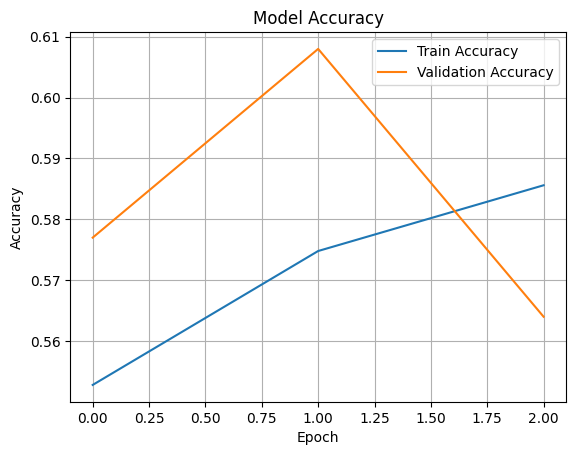

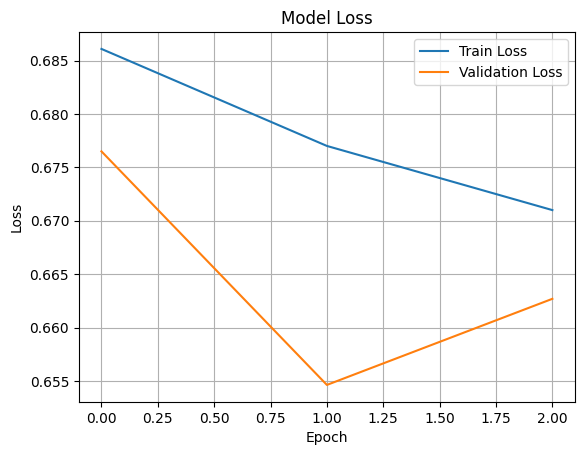

In [ ]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)
plt.show()
# Plot Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)
plt.show()


# **Accuracy, Precision, Recall, F1-score**

In [ ]:
from sklearn.metrics import classification_report

# Get predictions as binary labels
y_pred_probs = model.predict(X_test_small)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()

# Print metrics
print(classification_report(y_test_small, y_pred))


32/32 [==============================] - 518s 16s/step
              precision    recall  f1-score   support

       False       0.55      0.85      0.67       521
        True       0.61      0.25      0.36       479

    accuracy                           0.56      1000
   macro avg       0.58      0.55      0.51      1000
weighted avg       0.58      0.56      0.52      1000



# **Confusion Matrix**

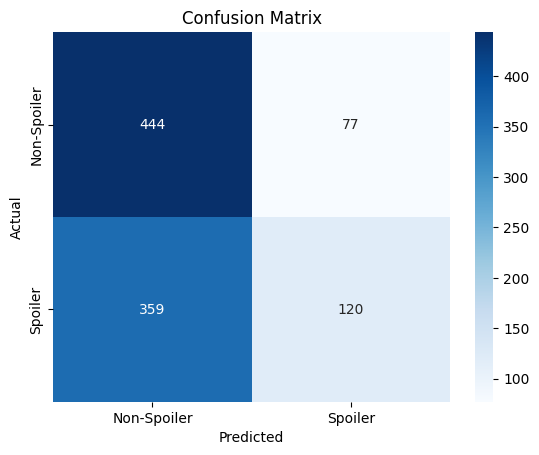

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test_small, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Spoiler', 'Spoiler'], yticklabels=['Non-Spoiler', 'Spoiler'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# **ROC Curve & AUC Score**

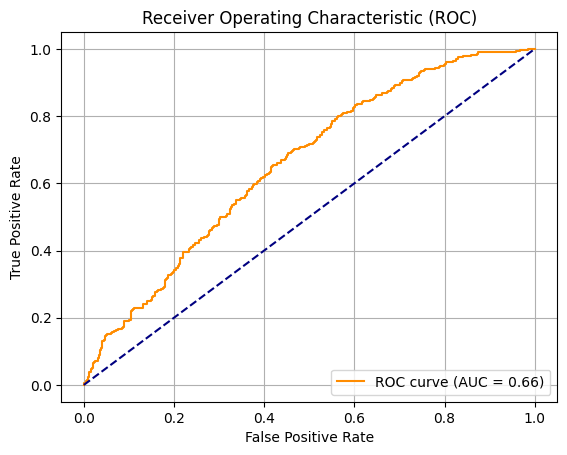

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test_small, y_pred_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid()
plt.show()
